Modified heavily from ICESat-2 and GEDI Crossovers by David Shean, November 22, 2021

In [1]:
from sliderule import sliderule, earthdata, h5, raster, icesat2, gedi
import geopandas as gpd
import numpy as np
import pandas as pd
sliderule.init()

/srv/conda/envs/notebook/lib/python3.10/site-packages/sliderule/sliderule.py:41: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


Let's look at Ellesmere Island. Holla @ [Jonathan Markle](https://j3d.space/) for this next snippet to get a bunch of datat without hitting `earthdata` limits

In [2]:
# manually defined using geojson.io
# aoi = gpd.GeoDataFrame.from_file('alaska_aoi.geojson', crs='EPSG:4326')
# aoi_filename = 'ellesmere.geojson'
aoi_filename = 'https://raw.githubusercontent.com/ICESAT-2HackWeek/dzdt/main/sites/ellesmere.geojson'

aoi = gpd.GeoDataFrame.from_file(aoi_filename, crs='EPSG:4326')

In [3]:
region = sliderule.toregion(aoi)

# Build ATL06 Request Parameters
parms_19 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2019-05-01',
    "t1":'2019-09-01',
}

parms_20 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2020-05-01',
    "t1":'2020-09-01',
}

parms_21 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2021-05-01',
    "t1":'2021-09-01',
}

parms_22 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2022-05-01',
    "t1":'2022-09-01',
}


# Make ATL06 requests, trying to avoid sliderule resource limits
print('Getting 2019 data')
atl06_19 = icesat2.atl06p(parms_19)

print('Getting 2020 data')
atl06_20 = icesat2.atl06p(parms_20)

print('Getting 2021 data')
atl06_21 = icesat2.atl06p(parms_21)

print('Getting 2022 data')
atl06_22 = icesat2.atl06p(parms_22)


Getting 2019 data
Getting 2020 data
Getting 2021 data
Getting 2022 data


In [4]:
gdf = pd.concat([atl06_19, atl06_20, atl06_21, atl06_22])

In [5]:
# I didn't like that the timestamp was the index 
gdf = gdf.reset_index()

In [6]:
gdf

time  spot  n_fit_photons  segment_id   rgt  \
0      2019-05-02 09:11:49.860251392     5            122      458285   521   
1      2019-05-02 09:11:49.861660160     5            232      458286   521   
2      2019-05-02 09:11:49.863069440     5            253      458286   521   
3      2019-05-02 09:11:49.864480256     5            229      458287   521   
4      2019-05-02 09:11:49.865890304     5            203      458287   521   
...                              ...   ...            ...         ...   ...   
638034 2022-08-27 23:17:44.370297088     3             19      460623  1024   
638035 2022-08-27 23:17:44.371707392     3             20      460624  1024   
638036 2022-08-27 23:17:44.373116672     3             27      460624  1024   
638037 2022-08-27 23:17:44.374526208     3             21      460625  1024   
638038 2022-08-27 23:17:44.375934976     3             15      460625  1024   

        dh_fit_dy  cycle      h_mean  gt  w_surface_window_final  dh_fit_dx  \
0             0.0      3   59.265253  50                5.981841   0.233353   
1             0.0      3   61.612141  50                5.799285   0.226155   
2             0.0      3   63.703435  50                5.054803   0.196771   
3             0.0      3   65.575650  50                4.803113   0.186824   
4             0.0      3   67.222548  50                4.031562   0.156271   
...           ...    ...         ...  ..                     ...        ...   
638034        0.0     16  411.000953  40                5.366380   0.209075   
638035        0.0     16  413.265455  40                6.666648   0.260335   
638036        0.0     16  415.666657  40                6.321516   0.246740   
638037        0.0     16  417.788881  40                5.418034   0.211114   
638038        0.0     16  420.067306  40                5.695158   0.222048   

        pflags  rms_misfit      distance   h_sigma                    geometry  
0            0    0.676928  9.183031e+06  0.078595  POINT (-61.93488 82.13671)  
1            0    0.652962  9.183041e+06  0.042869  POINT (-61.93505 82.13679)  
2            0    0.578095  9.183051e+06  0.036742  POINT (-61.93522 82.13688)  
3            0    0.502724  9.183061e+06  0.033863  POINT (-61.93539 82.13697)  
4            0    0.412225  9.183071e+06  0.029819  POINT (-61.93556 82.13705)  
...        ...         ...           ...       ...                         ...  
638034       0    0.531552  9.229679e+06  0.144600  POINT (-63.49436 82.53170)  
638035       0    0.520077  9.229689e+06  0.129678  POINT (-63.49455 82.53179)  
638036       0    0.468310  9.229699e+06  0.094147  POINT (-63.49474 82.53187)  
638037       0    0.439057  9.229709e+06  0.102782  POINT (-63.49493 82.53196)  
638038       0    0.566096  9.229719e+06  0.155530  POINT (-63.49512 82.53205)  

[638039 rows x 16 columns]

In [7]:
# Take a quick peek to see how many tracks might cross!
# Note this will take forever if you have a ton of points
# gdf.plot(column='cycle')

# Find overlapping points within buffer
Now I'm creating a radius for the points, which involves some reprojection

In [8]:
# A little script I have to get the EPSG string to give to the to_crs function
epsg_string = int(32700-(np.round((45+gdf.geometry.y.values.mean())/90,0)*100)+np.round((183+gdf.geometry.x.values.mean())/6,0))

In [9]:
# Now generate a buffer around each point and make a new dataframe for that 
radius = 7 #radius in meters
gdf_utm = gdf.to_crs(f'EPSG: {epsg_string}')
gdf_crop_poly_geom = gdf_utm.geometry.buffer(radius)
# gdf_crop_poly_geom.to_crs('EPSG:4326').plot()
gdf_crop_poly = gpd.GeoDataFrame(gdf.copy(), geometry=gdf_crop_poly_geom).to_crs('EPSG:4326')
gdf_crop_poly.shape

(638039, 16)

In [10]:
# This is a function that I am pretty sure grabs points that intersect with
# a buffer and calculate the temporal difference between point and buffer
def xover_proc(df):
    #Convert back to point geometry
    df['geometry'] = df.centroid.geometry
    df['dt_diff'] = df['time_left'] - df['time_right']   
    #Remove any self intersections
    idx = (df.index != df['time_right'])
    return df.loc[idx]


In [11]:
# This is new for me! You can do a spatial join on a single geodataframe to find
# the points that intersect with the buffers 
# This creates multiples
xover = gpd.sjoin(
    gdf_crop_poly,
    gdf_crop_poly,
)

In [12]:
# Now calculate the height differences for intersection areas
# Note that there will be pairs of differences - the positive and negatve
# as you subtract an earlier track from a later track and vice versa
xover['h_mean_diff'] = xover['h_mean_left'] - xover['h_mean_right']

# And do the function that gets the temporal difference
# I don't think the centroid error is that important here
xover = xover_proc(xover)


/tmp/ipykernel_1122/2390359495.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['geometry'] = df.centroid.geometry


OK so what have we done??

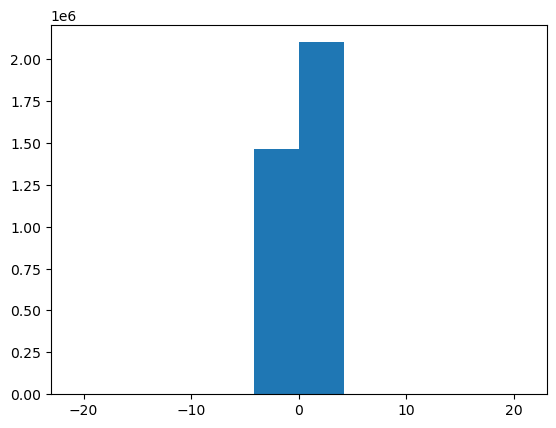

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = ax.hist(xover['h_mean_diff'].values)

So there are some huge height differences....seems weird but OK

# Temporal threshold

In [14]:
# What are the dates of these cycles?
xover.groupby('cycle_left')['time_left'].mean()

cycle_left
3    2019-05-23 01:53:57.786659840
4    2019-08-10 11:54:27.727908608
7    2020-05-25 06:03:44.546476800
8    2020-08-02 12:59:28.944797696
11   2021-05-18 05:51:46.168807680
12   2021-08-03 05:41:10.904357632
15   2022-05-20 22:20:28.466384384
16   2022-07-28 13:34:42.308616960
Name: time_left, dtype: datetime64[ns]

In [15]:
ndays = 30
dt_thresh = pd.Timedelta(days=ndays)
dt_thresh

Timedelta('30 days 00:00:00')

In [16]:
# Make sure the time between collection is more than 30 days
xover_thresh = xover.loc[xover['dt_diff'].abs() > dt_thresh]

In [17]:
# And now get rid of "doubles" by looking at only positive timedeltas
xover_thresh = xover_thresh[xover_thresh['dt_diff'] > pd.Timedelta(0)]

In [18]:
# Look at the unique combinations of cycle pairs for the crossovers
xover_thresh.groupby(['cycle_left', 'cycle_right']).size().reset_index().rename(columns={0:'count'})

cycle_left  cycle_right   count
0            3            3     153
1            4            3   69769
2            4            4      74
3            7            3   29502
4            7            4    4068
5            7            7      59
6            8            3   76122
7            8            4  113454
8            8            7   20743
9            8            8     501
10          11            3    5458
11          11            4    5664
12          11            7   31555
13          11            8    4662
14          12            3    5342
15          12            4    9394
16          12            7   19165
17          12            8   37664
18          12           11   54055
19          12           12     249
20          15            3   66910
21          15            4   68062
22          15            7   17478
23          15            8   50064
24          15           11    1241
25          15           12   10226
26          16            3   27618
27          16            4   18200
28          16            7    8450
29          16            8   38410
30          16           11   14170
31          16           12   35307
32          16           15   10342
33          16           16      81

# Map

I'm just going to look at cycles 16 minus 4 - late July three years apart!

In [34]:
exploring = gpd.GeoDataFrame(xover_thresh.filter(['h_mean_diff','cycle_left','cycle_right']), geometry=xover_thresh.geometry).to_crs('EPSG:4326')
exploring = exploring.query('cycle_left == 16 & cycle_right == 4')
exploring.explore(column='h_mean_diff')

Interesting...

<AxesSubplot: ylabel='Frequency'>

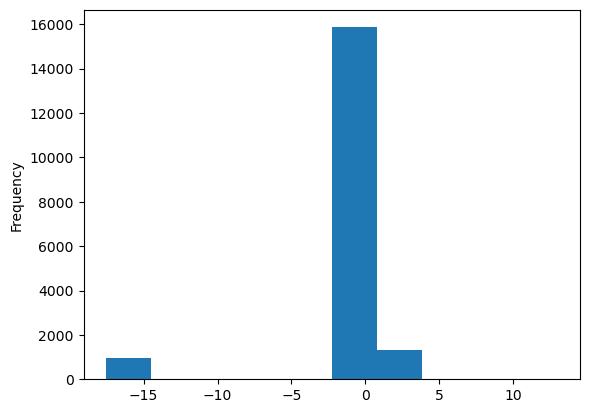

In [20]:
exploring['h_mean_diff'].plot.hist()

Yeah, not sure how I feel about that. I can believe the changes ~1.0 m but what are those big negative height differences??

# Google!

In [21]:
import ee
import geemap

In [22]:
try:
    ee.Initialize()
except: 
    ee.Authenticate()
    ee.Initialize()

In [23]:
from ipywidgets import Layout
Map = geemap.Map(layout=Layout(width='70%', max_height='450px'))
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [24]:
ground_track_coordinates = list(zip(exploring.geometry.x, exploring.geometry.y))
point_list = ee.List(ground_track_coordinates)
point_list
ground_track_projection = 'EPSG:4326' # <-- this specifies that our data longitude/latitude in degrees [https://epsg.io/4326]

# I don't want a LineString but I don't care rn
gtx_feature = ee.FeatureCollection(ee.Geometry.LineString(coords=point_list, 
                                      proj=ground_track_projection, 
                                      geodesic=True))
# gtx_feature

In [25]:
Map.add_basemap('SATELLITE') # <-- this adds a layer called 'Google Satellite'
Map.layer_opacity(name='Google Satellite', opacity=0.5)
Map.setCenter(exploring.geometry.x.mean(), exploring.geometry.y.mean(), zoom=7);
Map.addLayer(gtx_feature,{'color': 'red'},'ground track')

In [26]:
from datetime import datetime
from datetime import timedelta

In [27]:
(xover[xover['cycle_left']==4]['time_left'].mean()).date()

datetime.date(2019, 8, 10)

In [28]:
str(xover[xover['cycle_left']==4]['time_left'].mean())

'2019-08-10 11:54:27.727908608'

In [29]:
from datetime import datetime
collection_name1 = 'COPERNICUS/S2_SR_HARMONIZED'  # Landsat 8 earth engine collection 
# https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T2
collection = ee.ImageCollection(collection_name1)
point_of_interest = ee.Geometry.Point(exploring.geometry.x.mean(), exploring.geometry.y.mean())
collection = collection.filterBounds(point_of_interest)

days_buffer_imagery = 6
dateformat = '%Y-%m-%d'
datetime_requested = datetime.strptime(str(xover[xover['cycle_left']==4]['time_left'].mean().date()), dateformat)
search_start = (datetime_requested - timedelta(days=days_buffer_imagery)).strftime(dateformat)
search_end = (datetime_requested + timedelta(days=days_buffer_imagery)).strftime(dateformat)

In [30]:
collection_c4 = collection.filterDate(search_start, search_end).sort('system:time_start') 

In [31]:
info = collection_c4.getInfo()
len(info['features'])

38

In [32]:
myImage = collection.reduce(ee.Reducer.median())
myImage_RGB = myImage.select('B4_median', 'B3_median', 'B2_median')
vis_params = {'min': 0.0, 'max': 10000, 'opacity': 1.0, 'gamma': 1.5}
Map.addLayer(myImage_RGB, vis_params, name='Cycle 4')

In [33]:
datetime_requested = datetime.strptime(str(xover[xover['cycle_left']==16]['time_left'].mean().date()), dateformat)
search_start = (datetime_requested - timedelta(days=days_buffer_imagery)).strftime(dateformat)
search_end = (datetime_requested + timedelta(days=days_buffer_imagery)).strftime(dateformat)
collection_c16 = collection.filterDate(search_start, search_end).sort('system:time_start') 
myImage = collection_c16.reduce(ee.Reducer.median())
myImage_RGB = myImage.select('B4_median', 'B3_median', 'B2_median')
vis_params = {'min': 0.0, 'max': 10000, 'opacity': 1.0, 'gamma': 1.5}
Map.addLayer(myImage_RGB, vis_params, name='Cycle 16')
Map.addLayer(gtx_feature,{'color': 'red'},'ground track')